https://www.perplexity.ai/search/11c131c7-b2f1-44c7-bbcc-080db58fe95e

In [ ]:
#多間層的Series
import numpy as np
import pandas as pd

data = pd.Series(np.random.randn(9),
                index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                       [1, 2, 3, 1, 2, 3, 1, 2, 3]])
data.index.names = ('key1','key2')
data

key1  key2
a     1       1.091431
      2       0.842868
      3       0.104604
b     1      -1.128752
      2       0.775163
c     3      -0.563727
      1      -1.849737
d     2       0.496549
      3      -0.242546
dtype: float64

In [12]:
data.unstack(level='key1',fill_value=0)

key1,a,b,c,d
key2,,,,
1,1.091431,-1.128752,-1.849737,0.000000
2,0.842868,0.775163,0.000000,0.496549
3,0.104604,0.000000,-0.563727,-0.242546


In [18]:
#多階層的DataFrame
import numpy as np
import pandas as pd

df = pd.DataFrame(np.arange(12).reshape((4,3)),
                  index=[['a','a','b','b'],[1, 2, 1, 2]],
                  columns=[['台北','台北','台中'],['Green','Red','Green']])
df.index.names=['key1','key2']
df.columns.names = ['縣市',"顏色"]
df


縣市           台北        台中
顏色        Green Red Green
key1 key2                
a    1        0   1     2
     2        3   4     5
b    1        6   7     8
     2        9  10    11

In [19]:
df1 = df.stack(level=['縣市','顏色'],future_stack=True)
df1


key1  key2  縣市  顏色   
a     1     台北  Green     0
                Red       1
            台中  Green     2
      2     台北  Green     3
                Red       4
            台中  Green     5
b     1     台北  Green     6
                Red       7
            台中  Green     8
      2     台北  Green     9
                Red      10
            台中  Green    11
dtype: int64

In [20]:
df1.unstack(level=['key1','縣市','key2'],fill_value=0)

key1   a           b           
縣市    台北 台中 台北 台中 台北 台中  台北  台中
key2   1  1  2  2  1  1   2   2
顏色                             
Green  0  2  3  5  6  8   9  11
Red    1  0  4  0  7  0  10   0

In [21]:
import os
import pandas as pd
current_dir = os.path.dirname(os.path.abspath(__name__))
data_dir = os.path.join(current_dir,'data')
csv_filename = '台鐵車站資訊.csv'
csv_path = os.path.join(data_dir,csv_filename)
station_info = pd.read_csv(csv_path)
csv1_filename = '每日各站進出站人數2020.csv'
csv1_path = os.path.join(data_dir, csv1_filename)
inOut2020_df = pd.read_csv(csv1_path)
inOut2020_merge = pd.merge(inOut2020_df, station_info,how='left',left_on="staCode",right_on="stationCode")
#清理資料
df1 = inOut2020_merge.reindex(columns=['trnOpDate','gateInComingCnt','gateOutGoingCnt','stationName'])
df1.columns = ['日期','進站人數','出站人數','站名']
df1['日期'] = pd.to_datetime(df1['日期'].astype(str))
df2 = df1.set_index('日期')
df2

,進站人數,出站人數,站名
日期,,,
2020-01-01,7552,8154,基隆
2020-01-01,1020,1135,三坑
2020-01-01,1623,1972,八堵
2020-01-01,4130,4813,七堵
2020-01-01,1818,2128,百福
...,...,...,...
2020-12-31,3523,3602,瑞芳
2020-12-31,3,18,海科館
2020-12-31,28,34,八斗子


In [22]:
df2.groupby(by='站名').sum().T

站名,七堵,三坑,三塊厝,三姓橋,三民,三義,三貂嶺,上員,中壢,中洲,...,鳳山,鳳林,鶯歌,鹿野,麟洛,鼓山,龍井,龍泉,龍港,龜山
進站人數,2023475,457042,147363,386310,2748,257824,33705,17338,8722252,138474,...,1717645,125365,2884105,79453,49692,72794,129583,5827,5581,33665
出站人數,2055442,466250,160297,345666,4164,268159,49892,20059,8836667,136042,...,1672513,124964,2898044,76626,53910,75636,126229,6710,7490,32326


### Groupby機制
ˋˋˋ

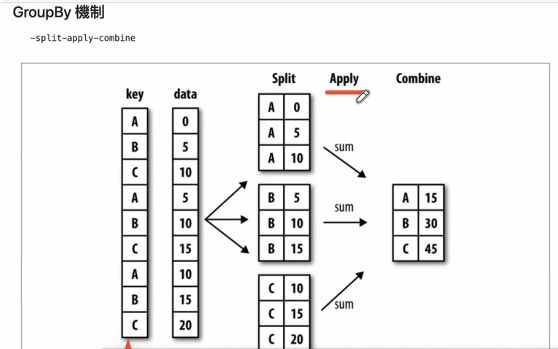
ˋˋˋ